# Meningkatkan Kemungkinan Lagu Baru dari Sebuah Artis Menjadi Populer dan Trending Berdasarkan Spotify Dataset Menggunakan Model Supervised Learning


In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
uniform_data = np.random.rand(10, 12)
data = pd.DataFrame({'x':np.arange(1,101),'y':np.random.normal(0,4,100)})

## Business Understanding

### Business Objective

Tujuan utama analisis pada dataset ini adalah meningkatkan popularitas dan potensi lagu-lagu baru yang akan dirilis oleh musisi. Analisis dilakukan dengan merujuk pada popularitas lagu-lagu yang telah ada di platform Spotify, dengan mempertimbangkan berbagai faktor penilaian yang telah ditentukan untuk setiap lagu. Dengan memahami karakteristik dan tren dari lagu-lagu yang sukses dan populer, kita dapat mengembangkan strategi yang lebih terarah untuk mengoptimalkan potensi keberhasilan lagu-lagu baru di pasar musik yang kompetitif.

### Assess Situation

Analisis ini didasari oleh dorongan untuk memperluas popularitas seorang artis musik melalui penilaian mendalam terhadap lagu-lagu yang akan dirilis. Pendekatan ini didasarkan pada kebutuhan mendalam untuk memahami selera dan harapan pendengar, dengan harapan dapat menciptakan karya yang tidak hanya memenuhi ekspektasi pendengar, tetapi juga meraih daya tarik luas. Dengan menganalisis kebutuhan pendengar secara cermat, kita dapat merancang strategi yang lebih terfokus untuk meningkatkan daya tarik setiap rilisan musik yang akan datang.

### Data Mining Goals

Tujuan dari analisis data ini adalah untuk menentukan pola-pola dari setiap lagu berdasarkan faktor-faktor yang mempengaruhi sebuah lagu yang populer dan trending di platform Spotify seperti durasi, tempo, dan lain-lain. Selanjutnya, rancangan kesuksesan lagu akan dibangun, memberikan pandangan yang dapat membantu dalam mengidentifikasi kesuksesan yang mungkin dapat diadaptasi sebagai strategi pembuatan dan pemasaran lagu-lagu baru di platform Spotify. Dengan demikian, analisis data ini diharapkan dapat memberikan wawasan yang mendalam dan bermanfaat untuk mendukung pengambilan keputusan terkait strategi musik khususnya di platform Spotify.

### Project Plan

Proyek ini diawali dengan tahap pengumpulan data dari sumber yang tersedia, yang melibatkan penggalian dataset yang relevan. Setelah itu, karakteristik dataset akan dijelaskan dengan mengidentifikasi variabel kunci terkait karakteristik lagu dan popularitas. Selanjutnya, kita akan melihat data lebih detail untuk mengidentifikasi pola-pola dan tren yang ada. Setelah itu, fokus akan beralih ke tahap preprocessing dan penilaian kualitas data dan analisis lebih lanjut akan dilakukan untuk mengidentifikasi korelasi dan hubungan antara fitur-fitur lagu dan popularitasnya. Pada tahap inti, model prediktif akan dikembangkan untuk memprediksi popularitas lagu, kemudian hasil dari model yang telah diimplementasikan akan digunakan untuk merumuskan rekomendasi dan mengembangkan strategi yang dapat meningkatkan popularitas lagu.

## Data Understanding

### Collect Initial Data

Dataset ini diambil dari Kaggle dengan username @MAHARSHIPANDYA. Dataset Spotify ini menyajikan kumpulan lagu dari berbagai genre musik sebanyak 125 jenis yang berbeda, memberikan pemandangan musik yang kaya dan beragam untuk dianalisis. Setiap data dalam dataset ini merepresentasikan satu lagu dan dilengkapi dengan serangkaian fitur audio yang mencakup berbagai aspek musik. Informasi tentang dataset ini dapat diakses pada link berikut: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

In [61]:
df_file = pd.read_csv("dataset.csv")
df_file.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### Describe Data

#### Informasi Dasar

In [ ]:
jumlah_baris, jumlah_kolom = df_file.shape
print(f"Jumlah Baris: {jumlah_baris}")
print(f"Jumlah Kolom: {jumlah_kolom}")

Jumlah Baris: 114000
Jumlah Kolom: 21


Dataset ini memiliki jumlah baris sebanyak 114000 yang berarti dataset ini menyimpan sebanyak 114000 data dan masing-masing data memiliki 21 kolom.

#### Informasi Lanjutan

In [ ]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

*Deskripsi Column*
1. track_id : Merupakan ID Spotify untuk tiap track lagu. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
2. artists : Merupakan nama dari artis yang menyanyikan lagu tersebut, jika terdapat lebih dari dua artis yang menyanyikan lagu tersebut maka dipisahkan dengan tanda ";". Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
3. album_name : Merupakan nama album dimana lagu tersebut berada. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
4. track_name : Merupakan nama track/lagu tersebut. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.
5. popularity : Merupakan kolom yang menilai  seberapa populer lagu tersebut dari 0 hingga 100, dengan 100 yang berarti lagu tersebut paling populer. Kepopularitasan lagu ini dinilai berdasarkan jumlah berapa kali lagu tersebut diputar dan seberapa kini putaran dari lagu tersebut dilakukan. Popularitas artis dan album diperoleh secara matematis dari popularitas lagu. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
6. duration_ms : Merupakan durasi lagu dalam milisecond. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
7. explicit : Merupakan penilaian apakah lirik dalam lagu tersebut berisi kata kasar atau tidak. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data booelan.
8. danceability : Merupakan penilaian seberapa menarik lagu tersebut untuk digunakan menari. Hal ini dinilai dari beberapa elemen musik seperti tempo, kestabilan ritme, kekuatan irama, dan keteraturan secara keseluruhan. Isi dari nilainya mulai dari 0.0 hingga 1.0. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
9. energy : Merupakan penilaian dari 0.0 hingga 1.0 berdasarkan intensitas dan aktivitas dari lagu tersebut. Biasanya lagu berenergi terasa lebih cepat, keras, dan berisik. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
10. key : Merupakan kunci dari lagu tersebut. Angka-angka ini menggambarkan nada menggunakan notasi Pitch Class standar. Contohnya, 0 = C, 1 = C♯/D♭, 2 = D, dan seterusnya. Jika tidak ada kunci yang terdeteksi, nilai yang digunakan adalah -1. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
11. loudness : Merupakan kenyaringan lagu secara keseluruhan dalam desibel (dB). Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
12. mode : Merupakan indikasi modalitas (Mayor atau Minor) dari sebuah lagu, jenis skala dari mana konten melodiannya berasal. Mayor direpresentasikan oleh 1 dan Minor oleh 0. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
13. speechiness : Speechiness mendeteksi keberadaan kata-kata yang diucapkan dalam sebuah lagu. Semakin eksklusif rekaman terdengar seperti pidato (misalnya, talk show, audio book, puisi), semakin mendekati nilai atribut 1.0. Nilai di atas 0.66 menggambarkan lagu yang mungkin sepenuhnya terdiri dari kata-kata yang diucapkan. Nilai antara 0.33 dan 0.66 menggambarkan lagu yang mungkin mengandung baik musik maupun ucapan, entah dalam bagian-bagian tertentu atau terlapis, termasuk kasus seperti musik rap. Nilai di bawah 0.33 kemungkinan besar mencerminkan musik dan lagu-lagu lain yang tidak mirip ucapan. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
14. acousticness : Sebuah ukuran kepercayaan dari 0.0 hingga 1.0 mengenai apakah lagu tersebut bersifat akustik. Angka 1.0 mencerminkan tingkat kepercayaan yang tinggi bahwa lagu tersebut bersifat akustik. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
15. instrumentalness : Memprediksi apakah sebuah lagu tidak mengandung vokal. Suara "ooh" dan "aah" dianggap sebagai instrumental dalam konteks ini. Lagu rap atau yang berisi kata-kata yang diucapkan dengan jelas dianggap "vokal". Semakin mendekati nilai instrumentalness 1.0, semakin besar kemungkinan lagu tersebut tidak mengandung konten vokal. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
16. liveness : Mendeteksi kehadiran penonton dalam rekaman. Nilai kehadiran yang tinggi mengindikasikan kemungkinan besar bahwa lagu tersebut dipentaskan secara langsung. Nilai di atas 0,8 memberikan kemungkinan besar bahwa lagu tersebut adalah rekaman live. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
17. valence : Sebuah ukuran dari 0.0 hingga 1.0 yang menggambarkan kepositifan musikal yang disampaikan oleh sebuah lagu. Lagu-lagu dengan valensi tinggi terdengar lebih positif (misalnya, ceria, bahagia, euforia), sementara lagu-lagu dengan valensi rendah terdengar lebih negatif (misalnya, sedih, tertekan, marah). Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
18. tempo : Kecepatan tempo secara keseluruhan dari sebuah lagu diukur dalam ketukan per menit (BPM). Dalam istilah musik, tempo adalah kecepatan atau laju suatu karya musik dan langsung berasal dari durasi rata-rata setiap ketukan. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data float64.
19. time_signature : Suatu tanda waktu yang diperkirakan. Tanda waktu (meter) merupakan konvensi notasi untuk menentukan berapa banyak ketukan yang ada dalam setiap bilah (atau ukuran). Tanda waktu bervariasi mulai dari 3 hingga 7, yang menunjukkan tanda waktu seperti 3/4 hingga 7/4. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data int64.
20. track_genre : Merupakan genre dari lagu tersebut. Kolom ini memiliki 114000 jumlah baris dan memiliki tipe data object.







#### Informasi Statistik Deskriptif

In [57]:
df_file.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


1. popularity :
- count = 114000
- mean = 33.238535
- std = 22.305078
- min = 0
- 25% = 17
- 50% = 35
- 75% = 50
- max = 100
2. duration_ms:
- count = 1.140000e+05
- mean = 2.280292e+05
- std = 1.072977e+05
- min = 0
- 25% = 1.740660e+05
- 50% = 2.129060e+05
- 75% = 2.615060e+05
- max = 5.237295e+06
3. danceability:
- count = 114000
- mean = 0.566800
- std = 0.173542
- min = 0
- 25% = 0.456000
- 50% = 0.580000
- 75% = 0.695000
- max = 0.985000
4. energy:
- count = 114000
- mean = 0.641383
- std = 0.251529
- min = 0
- 25% = 0.472000
- 50% = 0.685000
- 75% = 0.854000
- max = 1
5. key:
- count = 114000
- mean = 5.309140
- std = 3.559987
- min = 0
- 25% = 2
- 50% = 5
- 75% = 8
- max = 11
6. loudness:
- count = 114000
- mean = -8.258960
- std = 5.029337
- min = -49.531000
- 25% = -10.013000
- 50% = -7.004000
- 75% = -5.003000
- max = 4.532000
7. mode:
- count = 114000
- mean = 0.637553
- std = 0.480709
- min = 0
- 25% = 0
- 50% = 1
- 75% = 1
- max = 1
8. speechiness:
- count = 114000
- mean = 0.084652
- std = 0.105732
- min = 0
- 25% = 0.035900
- 50% = 0.048900
- 75% = 0.084500
- max = 0.965000
9. acousticness:
- count = 114000
- mean = 0.314910
- std = 0.332523
- min = 0
- 25% = 0.016900
- 50% = 0.169000
- 75% = 0.598000
- max = 0.996000
10. instrumentalness:
- count = 114000
- mean = 0.156050
- std = 0.309555
- min = 0
- 25% = 0
- 50% = 0.000042
- 75% = 0.049000
- max = 1
11. liveness:
- count = 114000
- mean = 0.213553
- std = 0.190378
- min = 0
- 25% = 0.098000
- 50% = 0.132000
- 75% = 0.273000
- max = 1
12. valence:
- count = 114000
- mean = 0.474068
- std = 0.259261
- min = 0
- 25% = 0.260000
- 50% = 0.464000
- 75% = 0.683000
- max = 0.995000
13. tempo:
- count = 114000
- mean = 122.147837
- std = 29.978197
- min = 0
- 25% = 99.218750
- 50% = 122.017000
- 75% = 140.071000
- max = 243.372000
14. time_signature:
- count = 114000
- mean = 3.904035
- std = 0.432621
- min = 0
- 25% = 4
- 50% = 4
- 75% = 4
- max = 5

### Exploratory Data Analysis

<ipython-input-10-e79115483196>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='popularity', y='track_genre', data=df_file, ci=None,


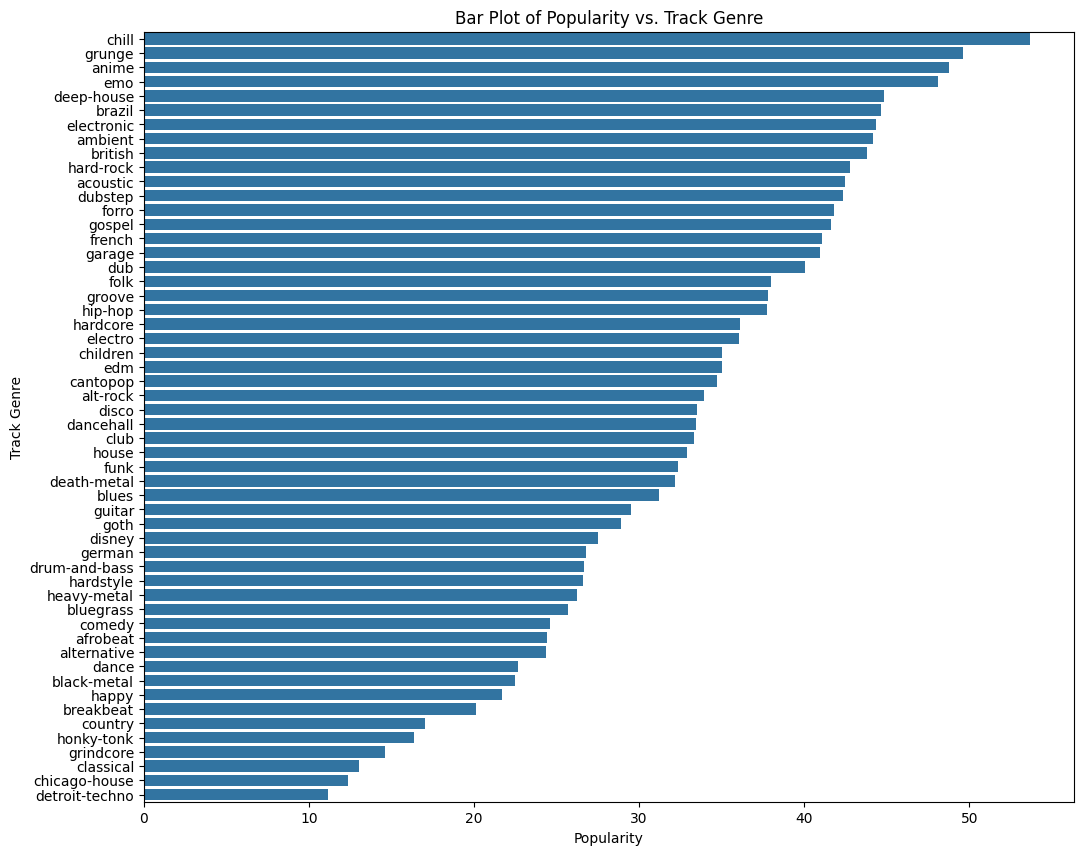

In [10]:
# sampledata = df_file.sample(n=100)

# Create the bar plot without error bars and in descending order
plt.figure(figsize=(12, 10))
sns.barplot(x='popularity', y='track_genre', data=df_file, ci=None,
            order=df_file.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).index)

# Set labels and title
plt.xlabel('Popularity')
plt.ylabel('Track Genre')
plt.title('Bar Plot of Popularity vs. Track Genre')

# Show the plot
plt.show()

Pada plot ini ada empat genre yang memiliki popularitas yang tinggi, yaitu chill, grunge, anime, dan emo. Empat genre ini akan kita gunakan nantinya untuk melihat korelasinya dengan variabel kolom-kolom penilaian yang lain. Kemudian pada plot ini juga dapat kita lihat bahwa genre classical, chicago-house, dan detroit techno memiliki tingkat popularitas yang rendah. Dengan hasil plot ini kita dapat memilih genre mana yang dapat meningkatkan kemungkinan dari popularitas musik nanti dan menghindari genre yang memiliki tingkat popularitas yang rendah.

<ipython-input-16-d663056e82c5>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='danceability', data=filtered_data, ci=None)


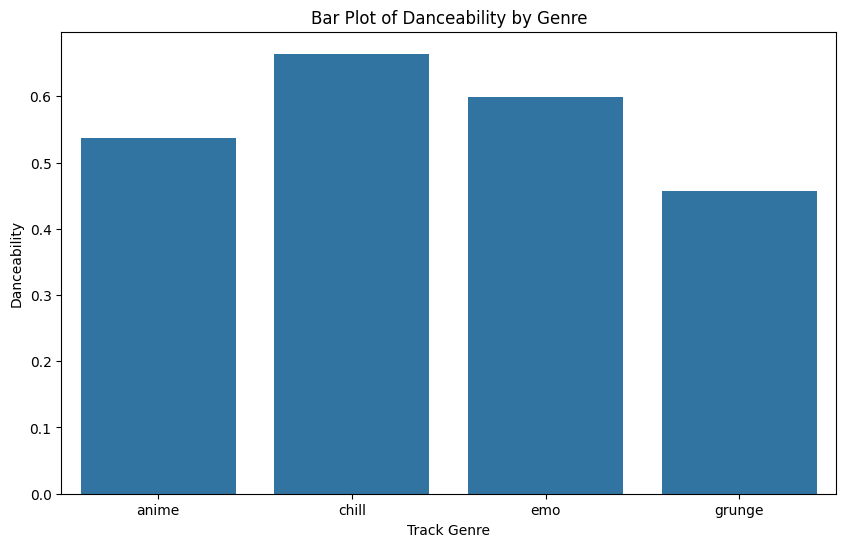

In [16]:
# sampledata = df_file.sample(n=100)

# Select the specific genres you are interested in
selected_genres = ["chill", "grunge", "anime", "emo"]
filtered_data = df_file[df_file['track_genre'].isin(selected_genres)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='danceability', data=filtered_data, ci=None)

# Set labels and title
plt.xlabel('Track Genre')
plt.ylabel('Danceability')
plt.title('Bar Plot of Danceability by Genre')

# Show the plot
plt.show()


Pada plot ini kita menggunakan empat genre yang memiliki  tingkat popularitas yang tinggi yang dapat kita lihat pada plot sebelumnya, genre chill memiliki nilai danceability tertinggi, diikuti oleh emo. Genre anime juga relatif cocok untuk berdansa, sedangkan genre grunge memiliki nilai danceability terendah. Pada empat top genre yang populer ini nilai danceability berkisar antara >0.4 hingga <0.7, dengan ini kita asumsikan bahwa untuk meningkatkan popularitas pada musik yang akan kita hasilkan nilai danceability harus ada pada kisaran angka tersebut.

<ipython-input-17-22b74df14c6f>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='energy', data=filtered_data, ci=None)


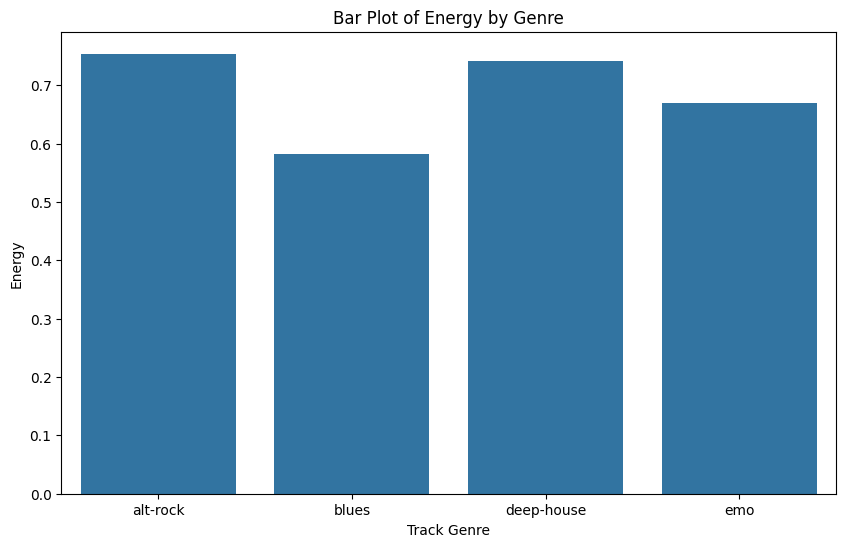

In [17]:
# sampledata = df_file.sample(n=100)

# Select the specific genres you are interested in
selected_genres = ["alt-rock", "blues", "deep-house", "emo"]
filtered_data = df_file[df_file['track_genre'].isin(selected_genres)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='energy', data=filtered_data, ci=None)

# Set labels and title
plt.xlabel('Track Genre')
plt.ylabel('Energy')
plt.title('Bar Plot of Energy by Genre')

# Show the plot
plt.show()

Pada plot ini, genre yang memiliki tingkat kepopularitasan yang tinggi memiliki nilai energy yang berkisar antara >0.5 hingga <0.8. Dengan alt-rock yang memiliki tingkat energy yang tinggi diikuti dengan deep-house dan emo, sedangkan blues memiliki tingkat energy yang lebih rendah. Dengan ini dapat kita asumsikan bahwa untuk meningkatkan popularitas pada musik yang akan kita hasilkan nilai energy harus ada pada kisaran angka tersebut.

<ipython-input-22-7df87278b7f1>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='track_genre', y='valence', data=filtered_data, ci=None)


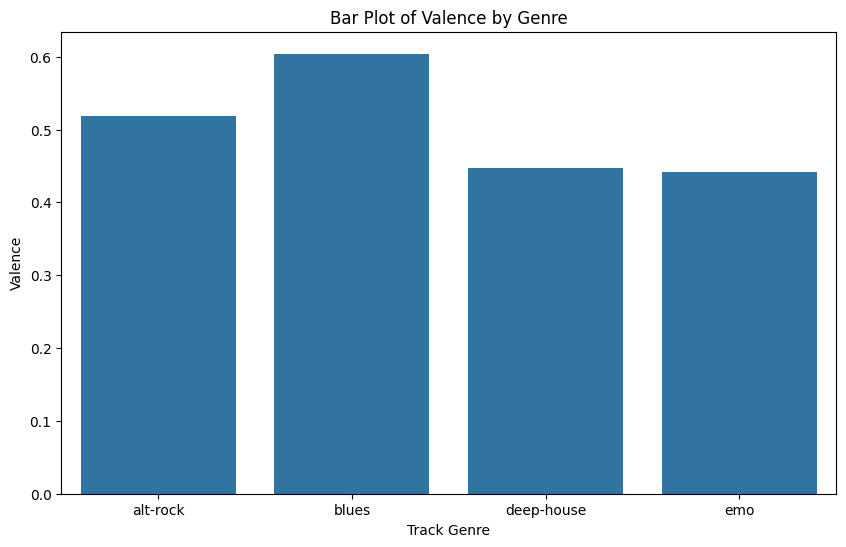

In [22]:
# sampledata = df_file.sample(n=100)

# Select the specific genres you are interested in
selected_genres = ["alt-rock", "blues", "deep-house", "emo"]
filtered_data = df_file[df_file['track_genre'].isin(selected_genres)]

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='track_genre', y='valence', data=filtered_data, ci=None)

# Set labels and title
plt.xlabel('Track Genre')
plt.ylabel('Valence')
plt.title('Bar Plot of Valence by Genre')

# Show the plot
plt.show()

Pada plot ini dapat kita lihat bahwa genre yang memiliki tingkat popularitas yang tinggi memiliki nilai valence yang berkisar antara >0.4 hingga 0.6. Dapat diasumsikan bahwa untuk mencipatakan lagu yang populer nilai kepositifan sebuah lagu sebaiknya tidak terlalu positif dalam konteks cheerful dan juga tidak terlalu negatif dalam konteks sedih. Dengan blues yang memiliki nilai valence tertinggi diikuti dengan alt-rock, deep-house, dan emo. Dengan ini dapat kita asumsikan bahwa untuk meningkatkan popularitas pada musik yang akan kita hasilkan nilai valence harus ada pada kisaran angka tersebut.

### Verify Data Quality

#### Missing Values

In [25]:
missing_values = df_file.isnull().sum()

print(missing_values)

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


Dapat kita lihat di atas bahwa pada kolom artists, album_name, dan track_name terdapat satu missing values. Dan untuk kolom sisanya seperti track_id, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, dan track_genre tidak memiliki missing values pada kolomnya.

#### Outliers Value

In [68]:
def detect_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1

    outliers = (column < (Q1 - 1.5 * IQR)) | (column > (Q3 + 1.5 * IQR))

    percentage_outliers = outliers.sum() / len(column) * 100

    return outliers, percentage_outliers

for column in df_file.columns:
    outliers, percentage_outliers = detect_outliers(df_file[column])

    print(f"Kolom '{column}':")
    print(f"  - Jumlah outliers: {outliers.sum()}")
    print(f"  - Persentase kehadiran outliers: {percentage_outliers:.2f}%")
    print()

Kolom 'popularity':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'duration_ms':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'danceability':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%

Kolom 'speechiness':
  - Jumlah outliers: 0
  - Persentase kehadiran outliers: 0.00%



Setiap kolom yang ada pada hasil di atas memiliki jumlah outliers sebanyak 0 dan masing-masing juga memiliki persentase kehadiran outliers sebesar 0.00%

#### Duplicated Values

In [58]:
duplicate_values =(df_file.duplicated())

print("Apakah Ada Nilai Duplikat pada Tiap Kolom:")
print(duplicate_values)

Output streaming akan dipotong hingga 5000 baris terakhir.
109001    False
109002    False
109003    False
109004    False
109005    False
109006    False
109007    False
109008    False
109009    False
109010    False
109011    False
109012    False
109013    False
109014    False
109015    False
109016    False
109017    False
109018    False
109019    False
109020    False
109021    False
109022    False
109023    False
109024    False
109025    False
109026    False
109027    False
109028    False
109029    False
109030    False
109031    False
109032    False
109033    False
109034    False
109035    False
109036    False
109037    False
109038    False
109039    False
109040    False
109041    False
109042    False
109043    False
109044    False
109045    False
109046    False
109047    False
109048    False
109049    False
109050    False
109051    False
109052    False
109053    False
109054    False
109055    False
109056    False
109057    False
109058    False
109059    Fal

Untuk hasil dari cek duplikasi dataset yang ada di atas dapat disimpulkan bahwa banyak data yang tidak ada data yang duplikat sehingga tidak berpengaruh terhadap statistik deskriptif yang berarti bisa menjadi bias dan tidak mencerminkan variasi sebenarnya didalam dataset.